# Binary Image Classification using LeNet-5 on MNIST (Even vs Odd)

In [1]:
!pip install tensorflow matplotlib scikit-learn --quiet

### Import Required Libraries
- We import TensorFlow for model building, NumPy for data manipulation,
- Matplotlib and Seaborn for visualization, and scikit-learn for metrics.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preprocess the MNIST Dataset
- The MNIST dataset contains handwritten digits from 0 to 9.
- We convert the problem into binary classificatio

In [14]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### Create Binary Labels for Even vs Odd
- Labels are transformed: even → 0, odd → 1

In [15]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
# Convert to binary: 0 if even, 1 if odd
y_train_binary = (y_train % 2 != 0).astype(np.int32)
y_test_binary = (y_test % 2 != 0).astype(np.int32)

### Normalize the Pixel Values and Reshape
- Pixel values are scaled to [0, 1] and reshaped to (28, 28, 1) for CNN input.


In [17]:
# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [18]:
x_train[0].shape

(28, 28)

In [7]:
x_train = np.expand_dims(x_train, -1)  # (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

### Define the LeNet-5 Architecture in TensorFlow
- LeNet-5 is one of the earliest CNN architectures, originally for digit recognition.
- Architecture Overview:
- Conv Layer (6 filters, 5x5) + Average Pooling
- Conv Layer (16 filters, 5x5) + Average Pooling
- Fully Connected: 120 → 84 → 1
- Sigmoid activation for binary classification


In [26]:
def build_lenet5():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    return model


### Compile the Model
- We use binary crossentropy loss and the Adam optimizer.
- Accuracy is used as the evaluation metric.

In [27]:
model = build_lenet5()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,825 (714.16 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 121,884 (476.11 KB)

### Train the Model on the Training Data
- The model is trained for 10 epochs with validation split.
- Batch size is set to 128.

In [23]:
history = model.fit(
    x_train, y_train_binary,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 30s - 72ms/step - accuracy: 0.9407 - loss: 0.1543 - val_accuracy: 0.9788 - val_loss: 0.0635
Epoch 2/10
422/422 - 23s - 54ms/step - accuracy: 0.9809 - loss: 0.0553 - val_accuracy: 0.9863 - val_loss: 0.0414
Epoch 3/10
422/422 - 43s - 101ms/step - accuracy: 0.9853 - loss: 0.0409 - val_accuracy: 0.9885 - val_loss: 0.0363
Epoch 4/10
422/422 - 38s - 90ms/step - accuracy: 0.9880 - loss: 0.0331 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 5/10
422/422 - 39s - 92ms/step - accuracy: 0.9902 - loss: 0.0286 - val_accuracy: 0.9893 - val_loss: 0.0297
Epoch 6/10
422/422 - 21s - 49ms/step - accuracy: 0.9916 - loss: 0.0236 - val_accuracy: 0.9905 - val_loss: 0.0280
Epoch 7/10
422/422 - 24s - 58ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9920 - val_loss: 0.0279
Epoch 8/10
422/422 - 38s - 90ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 9/10
422/422 - 22s - 51ms/step - accuracy: 0.9943 - loss: 0.0165 - val_accuracy: 0.9915 -

### Evaluate the Model on the Test Set
- We evaluate the trained model to check generalization performance.

In [24]:
loss, acc = model.evaluate(x_test, y_test_binary, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9931


### Predict and Visualize with Confusion Matrix
- Model predictions are converted to binary outputs (threshold 0.5).
- Confusion matrix and classification report give deeper insight.

In [28]:
y_pred_probs = model.predict(x_test)
y_pred_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[1.0000000e+00],
       [1.0704986e-06],
       [9.9910206e-01],
       ...,
       [8.0183150e-07],
       [9.9997735e-01],
       [5.1238220e-07]], dtype=float32)

In [29]:
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

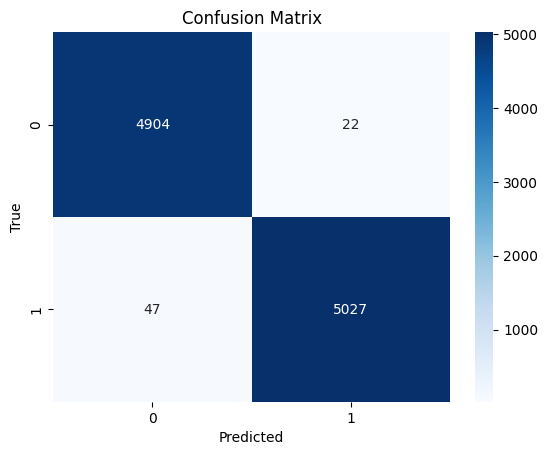

In [31]:
cm = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Generate the Classification Report

In [30]:
print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4926
           1       1.00      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

